## Problem Statement: Term Deposit Sale

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import  StandardScaler,OneHotEncoder, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import roc_curve, auc

In [118]:
os.chdir(r"D:\Great Lakes Material\Ensmeble Learning")

In [125]:
df = pd.read_csv("bank-full.csv")

The dataset contains 16 independent variable and 1 dependent variable of categoical datatype so it's a classification problem we will use mostly classifcation model. The independet variable consist of numerical and categorical data types. Summary of data:
Categorical Variables :
1. job : admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student 
2. marital : married, single, divorced 
3. education: secondary, tertiary, primary, unknown 
4. default : yes, no 
5. housing : yes, no 
6. loan : yes, no 
7. deposit : yes, no (Dependent Variable) 
8. contact : unknown, cellular, telephone 
9. month : jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec 
10. poutcome: unknown, other, failure, success

Numerical Variables:
1. age 
2. balance 
3. day 
4. duration 
5. campaign 
6. pdays 
7. previous

In [4]:
df.shape

(45211, 17)

In [5]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## Five point summary
1. It is clear that, most of the numeric variable don't follow normal distribution
2.  Balance, duration, pdays has extreme right values.
3. All the numerical data variables are having long tails 
4. After look at the data it is better to drop the duration column since duration is highly correlated w.r.t client to buy a term deposit. Also, duration is obtained after the call is made to the client so if the client has never received calls this feature is not that useful. Also the reason why duration should be highly correlated with opening a term deposit is because the more the bank talk with client the higher the chances of the client opening a term deposit.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [7]:
# Check the number unique values with categorical variable
for col in df.columns:
    if df[col].dtype == 'object':     
        print(col, "column unque values: ",np.unique(df[col].values)) 

job column unque values:  ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital column unque values:  ['divorced' 'married' 'single']
education column unque values:  ['primary' 'secondary' 'tertiary' 'unknown']
default column unque values:  ['no' 'yes']
housing column unque values:  ['no' 'yes']
loan column unque values:  ['no' 'yes']
contact column unque values:  ['cellular' 'telephone' 'unknown']
month column unque values:  ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome column unque values:  ['failure' 'other' 'success' 'unknown']
Target column unque values:  ['no' 'yes']


# Missing value analysis
There are no missing value present in the dataset. If there was at all any missing value I will use below st\rategy:

In case of numerics variable, I would replce the missing value using mean or median method
In case of categorical variable, I would use the min or max mode method to replace the missing value

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Outlier Analysis
1. Day is not having outliers.
2. For all the other numeric variables the data seems to be having extreme values.
3. We are not going to replace any of the extreme values. If there are any outliers present we should replace them with mean or median value depending upon the quratile range.

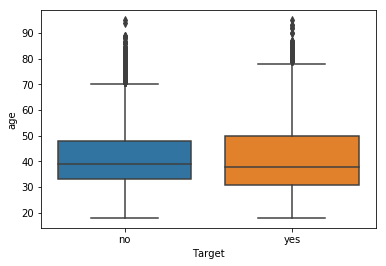

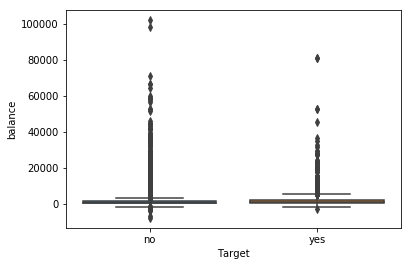

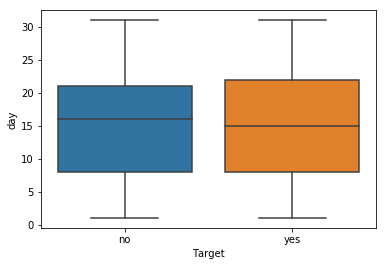

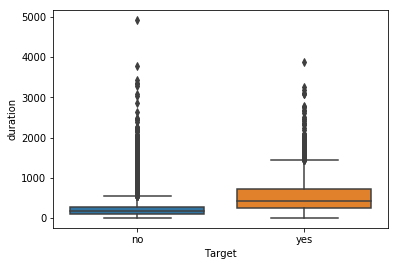

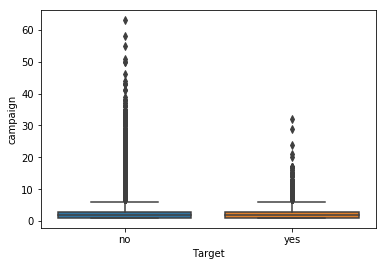

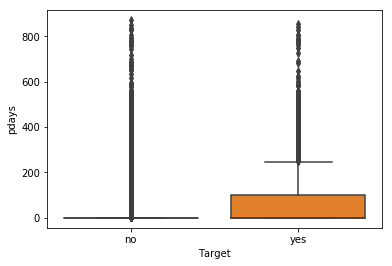

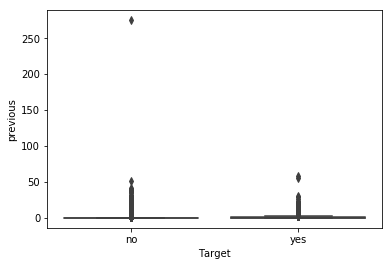

In [9]:
num_data = df._get_numeric_data()
for col in num_data.columns:
     plt.figure(col)
     sns.boxplot(x='Target',y=col,data=df)

# Eplodatory data analysis
## 1. Univariate analysis

In [10]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

# Categorical variable Count plot
After plotting the count for the default column very less number of observation for yes category. As I have very little information about default column so it should be eliminated.

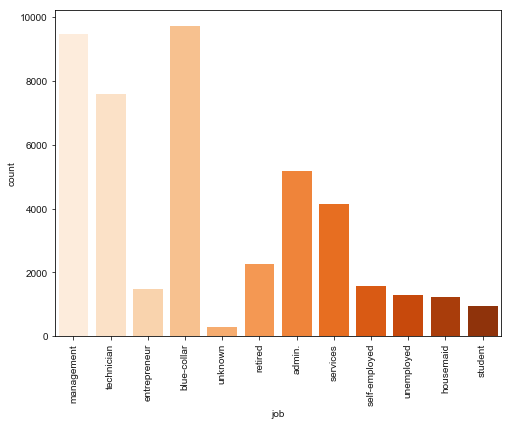

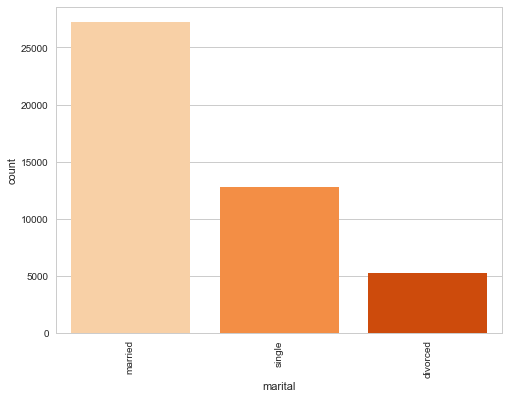

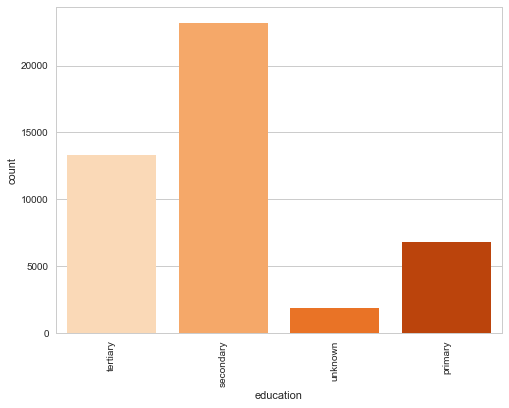

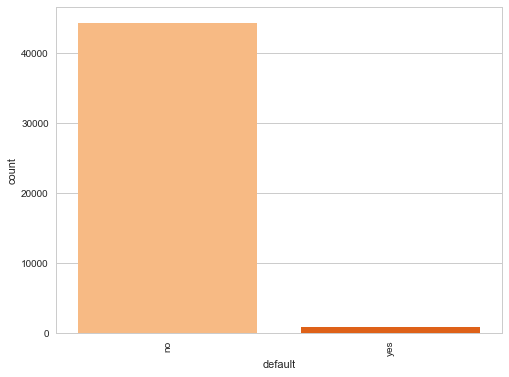

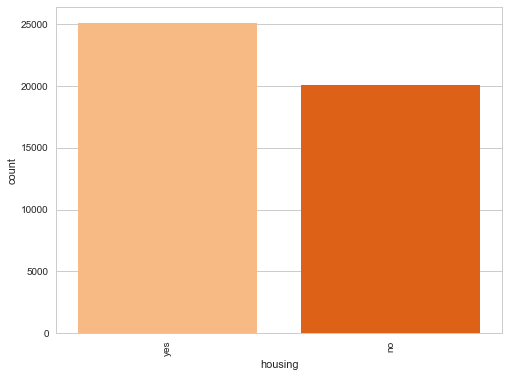

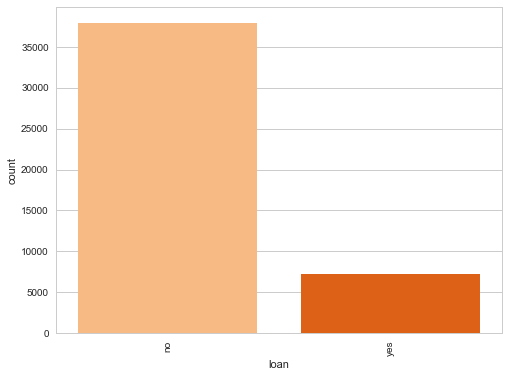

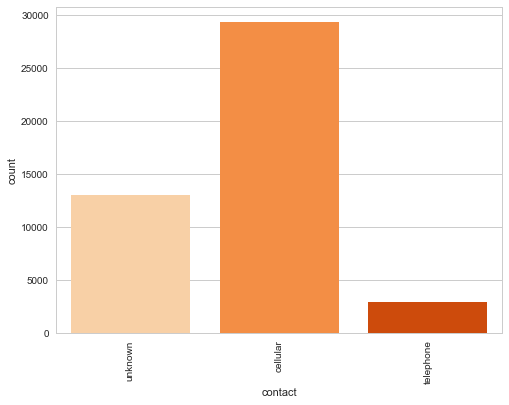

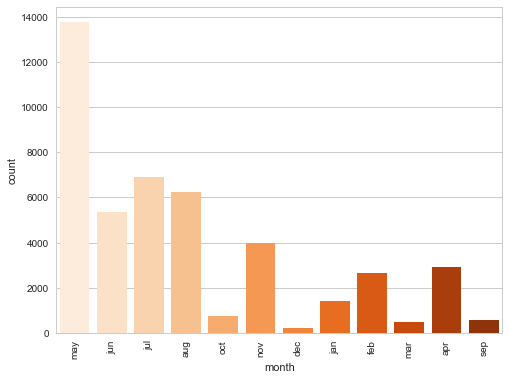

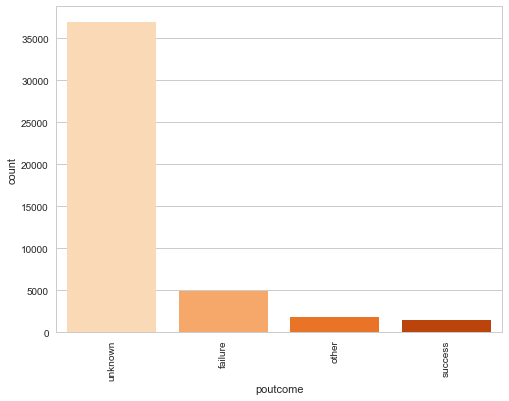

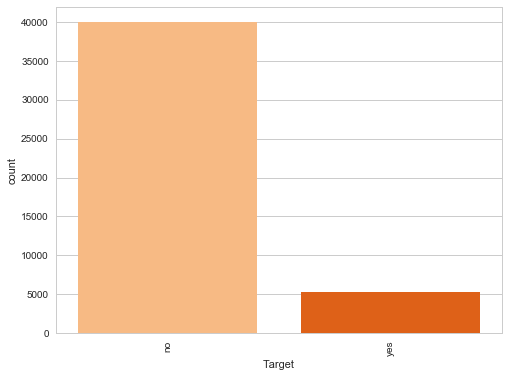

In [11]:
for col in df.columns:
    if df[col].dtype == 'object':  
        fig, ax = plt.subplots(figsize=(8,6))
        sns.set(style="whitegrid", color_codes=True)
        sns.countplot(ax = ax, x=col, data=df, palette="Oranges",saturation=0.9)
        plt.xticks(rotation=90)
        plt.show()

# Day column
In the data descrition day column which have range of values from 1 t0 31. I thnk these feature will not have any impact on
target column. Let's us look at the relative mean and data distribution of variable within classes. From the boxplot still not clear that difference of mean are very thin so we can get rid of the day column

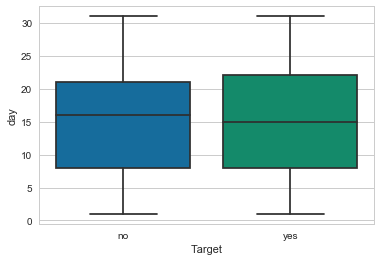

In [12]:
sns.boxplot(y='day', x='Target', data=df, palette="colorblind")

# Histogram plot
1. All the Histogram suggest that data is skewed towards left so we have to sample the data efficiently while classifiying the train_data and test_data.
2. If we talk about feature "previous"(number of contacts performed before this campaign and for this client). We can clearly see that most of the value "0". We should transform the feature into the binary one, saying, whether or not the client was contacted before.

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


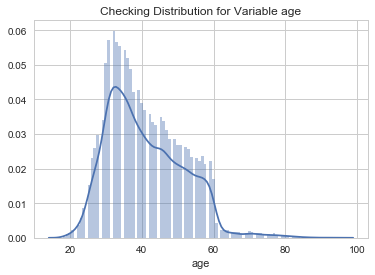

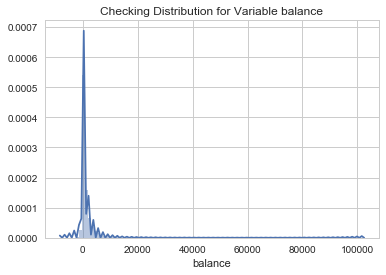

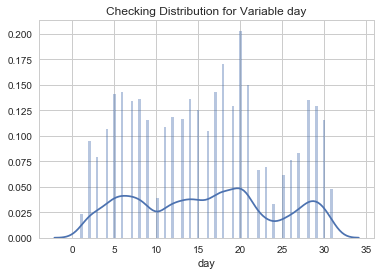

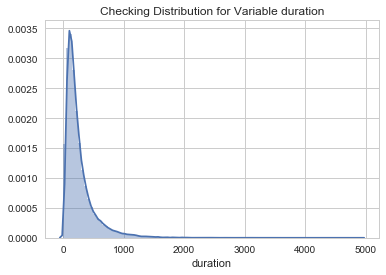

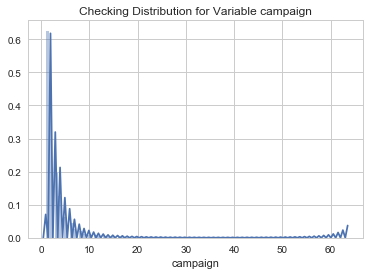

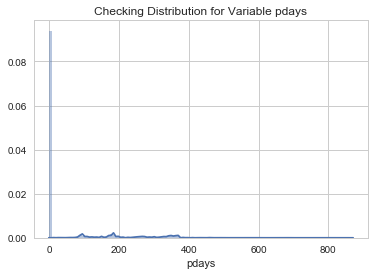

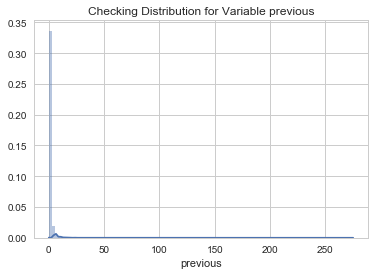

In [13]:
num_data =  df._get_numeric_data()
print(num_data.columns)
for i, col in enumerate(num_data.columns):
        plt.figure(i)
        sns.distplot(num_data[col],bins = 100)
        plt.title("Checking Distribution for Variable "+col)

In [ ]:
#df.previous = df.previous.map(lambda x: 0 if x == 0 else 1)

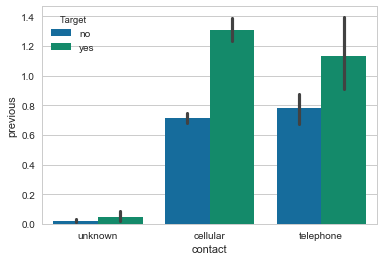

In [14]:
sns.barplot(y='previous', x='contact',hue='Target', data=df, palette="colorblind")

1. From pi chart, we can say that majority of the clients have not opted for the teem deposit scheme. 
2. After plotting the bar plot against for education categorical variable, we can say that majority of the cutomer who has opted for term deposit are from the secondary and teritary education category 

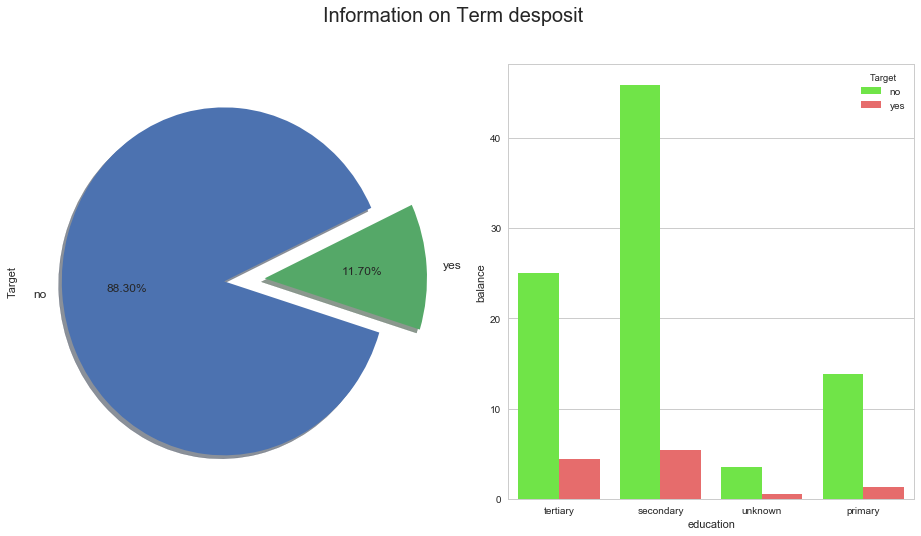

In [17]:
f, ax = plt.subplots(1,2, figsize=(16,8))
plt.suptitle('Information on Term desposit', fontsize=20)
df["Target"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True,
                                      fontsize=12, startangle=25)
palette = ["#64FE2E", "#FA5858"]
sns.barplot(x="education", y="balance", hue="Target", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
plt.show()

## 2. Bivariate Analysis
1. Number of Occupations: Management is the occupation that is more prevalent in this dataset.
2. Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.
3. Balance by Occupation: Management and Retirees are the ones who have the very good balance in their accounts.
4. Balance by education: Seondary and teritary are having good balance in the account

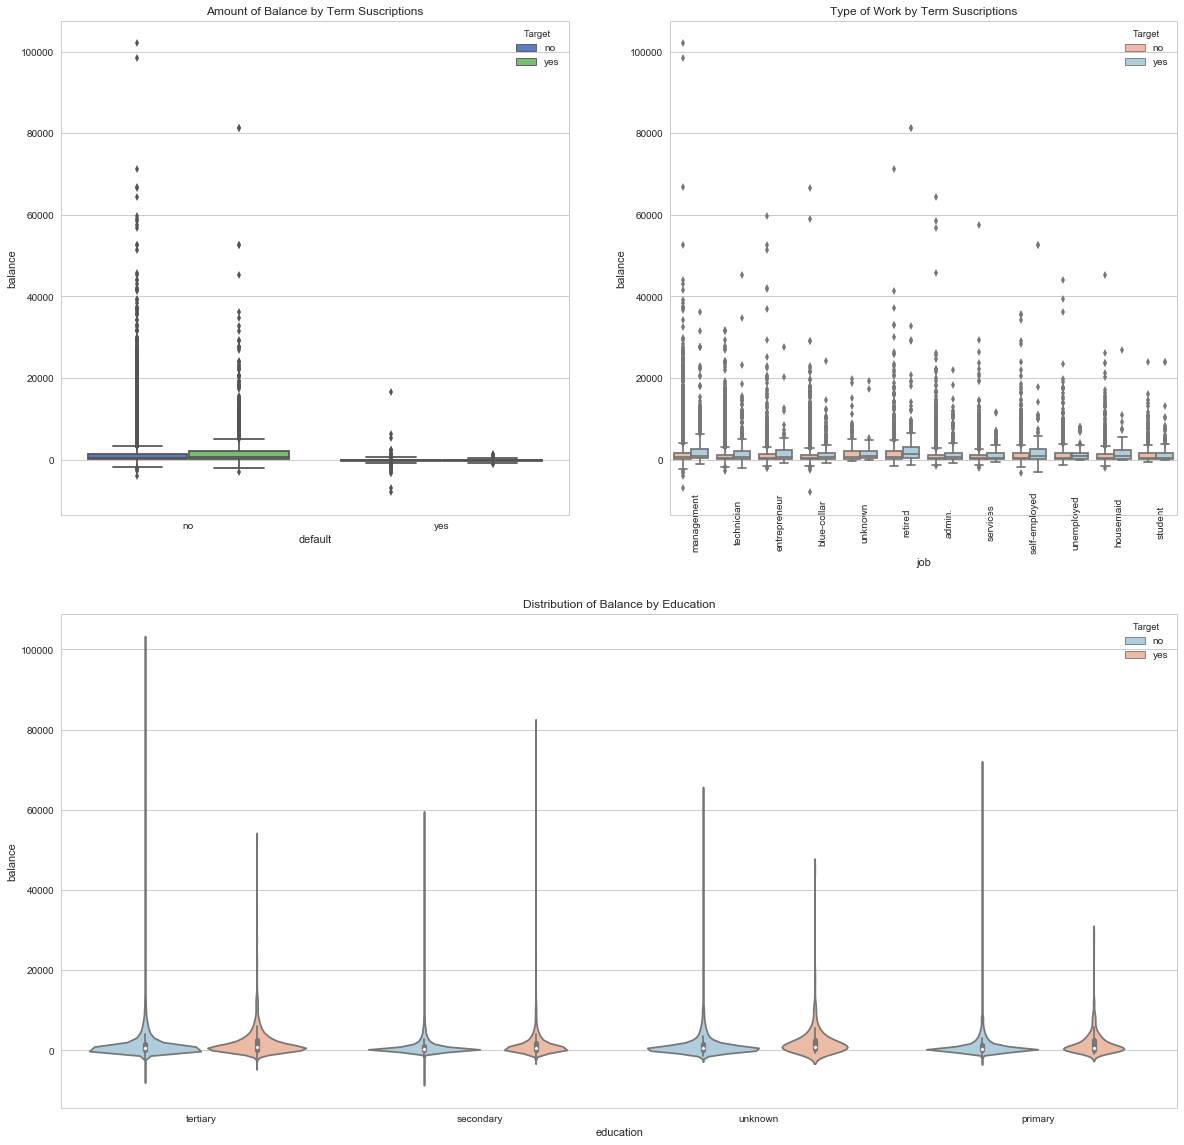

In [18]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)
g = sns.boxplot(x="default", y="balance", hue="Target",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")
g1 = sns.boxplot(x="job", y="balance", hue="Target",data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="Target", palette="RdBu_r")
g2.set_title("Distribution of Balance by Education")


plt.show()

 # Term deposit by job:<br>
 1. From below table we cans ay that management, technician, blue-collar,retired and student has opted for the term deposit scheme in good numbers
 2. Count plot also show that management, technician, blue-collar, admin and retired has opted for the term deposit scheme in good numbers

In [19]:
pd.crosstab(df['Target'],df['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
Target,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
yes,631,708,123,109,1301,516,187,369,269,840,202,34


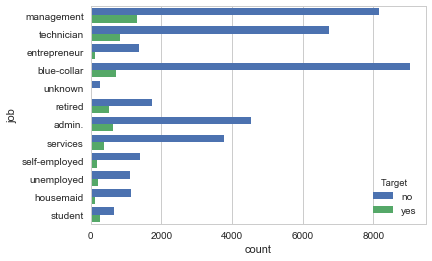

In [20]:
sns.countplot(y="job", data=df, hue="Target",saturation=2.0,orient='h')

 ## From the marital categorical variable count plot it has been observed that, single and divorced category people have choose term deposit in more number than married people.

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


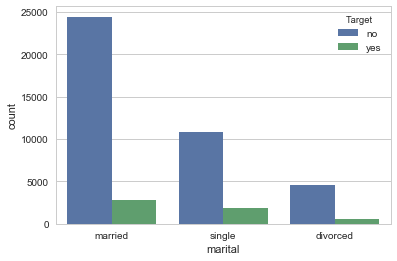

In [21]:
print(df['marital'].value_counts())
sns.countplot(x="marital",data=df,hue='Target')

# Marital independent variable analysis
- There are very less number when the person is having loan and have opted for the term desposit scheme.
- There are maximum chances of accepting term deposit when the person is not having loan
- There are maximum chances of accepting term deposit when the person is not owning any house
- Most of the previous outcome are unknown so not a conclusive decision can be formed

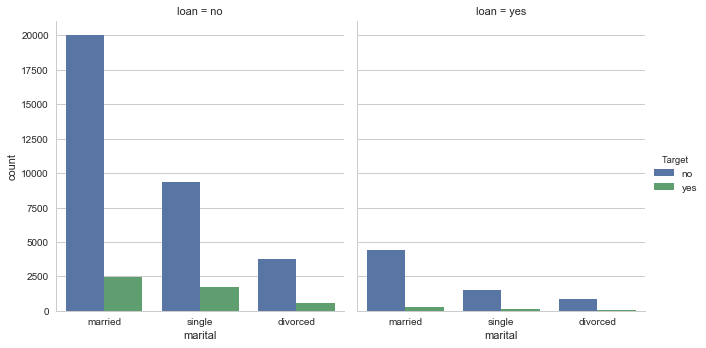

In [22]:
# Let's see the group who had loans from the marital/education group
sns.factorplot(x="marital", hue="Target", col="loan", data=df, kind="count",size=5, aspect=.9)

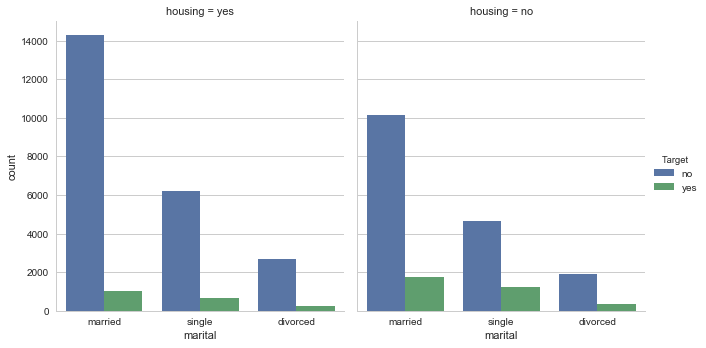

In [23]:
sns.factorplot(x="marital", hue="Target", col="housing", data=df, kind="count",size=5, aspect=.9)

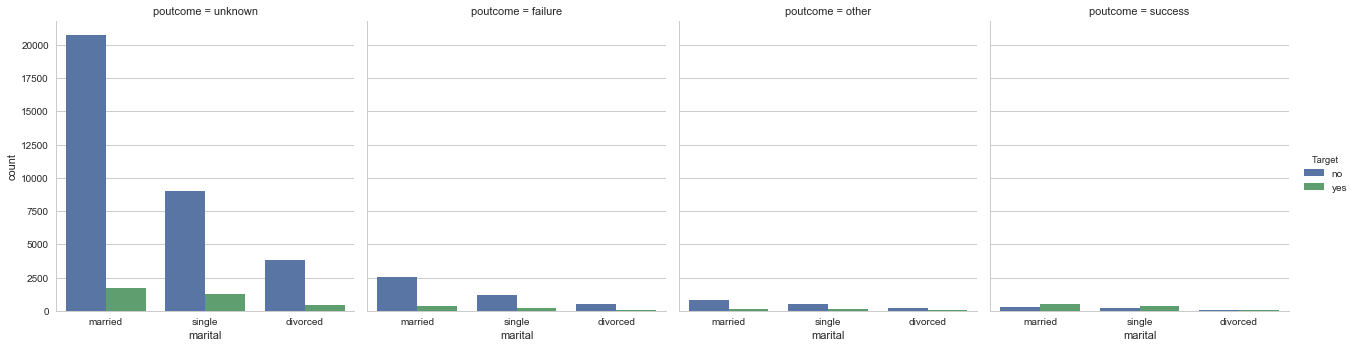

In [24]:
sns.factorplot(x="marital", hue="Target", col="poutcome", data=df, kind="count",size=5, aspect=.9)

# Education independent variable bivariate analysis
1. Mostly secondary educated and married along with single marital category people have opted for the term deposit in good number
2. Mostly teritory educated and married along with single marital category people have opted for the term deposit in good number
3. Blue collar job type with primary education cataegory client has opted for term deposit
4. Previous outcome also suggest that mostly secondary and teritary clients has successfully registered for term desposit

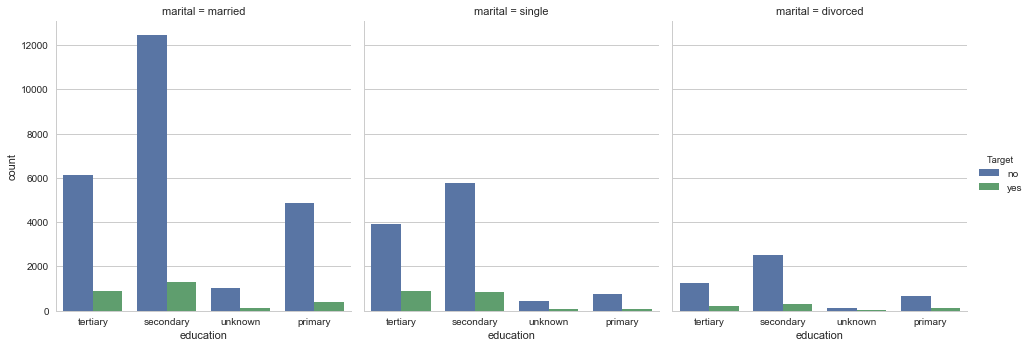

In [25]:
sns.factorplot(x="education", hue="Target", col="marital", data=df, kind="count",size=5, aspect=.9)

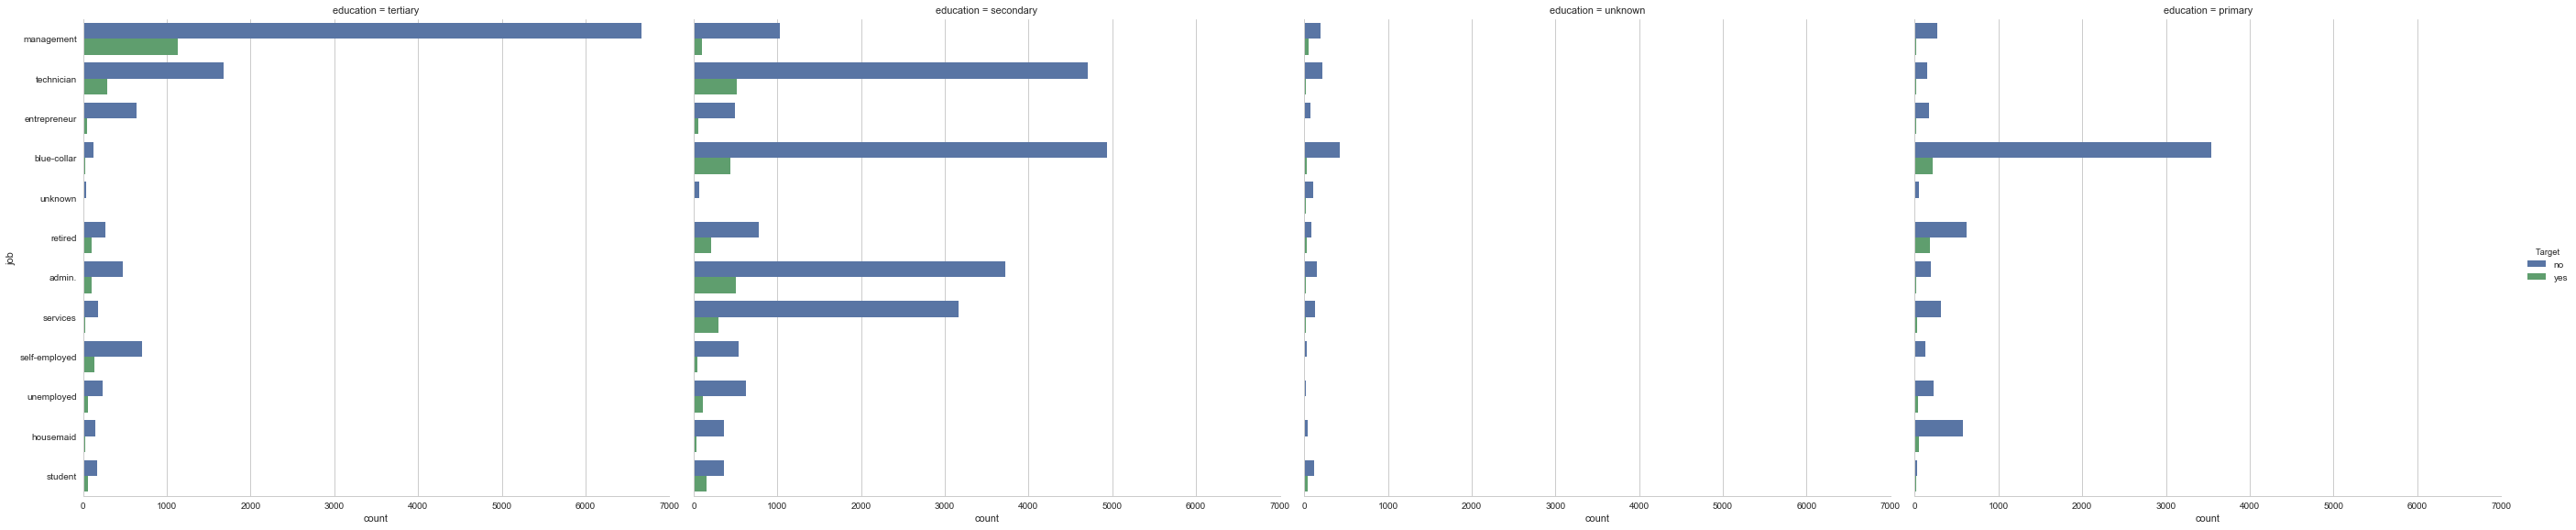

In [26]:
sns.factorplot(y="job", hue="Target", col="education", data=df, kind="count",size=8, aspect=1.2,orient='v')

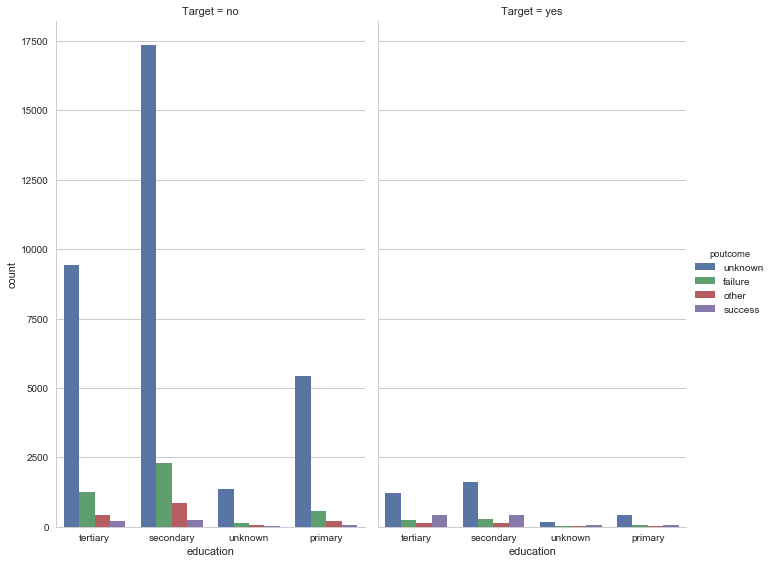

In [27]:
sns.factorplot(x="education", hue="poutcome", col="Target", data=df, kind="count",size=8, aspect=.6)

# Job independent variable bivariate analysis
1. Mostly management, technician, retired, admin and student job type category client has opted for the term deposit among the provided data
2. Mostly teritory educated and married along with single marital category people have opted for the term deposit in good number
3. Blue collar job type with primary education cataegory client has opted for term deposit
4. Previous outcome also suggest that mostly secondary and teritary clients has successfully registered for term desposit

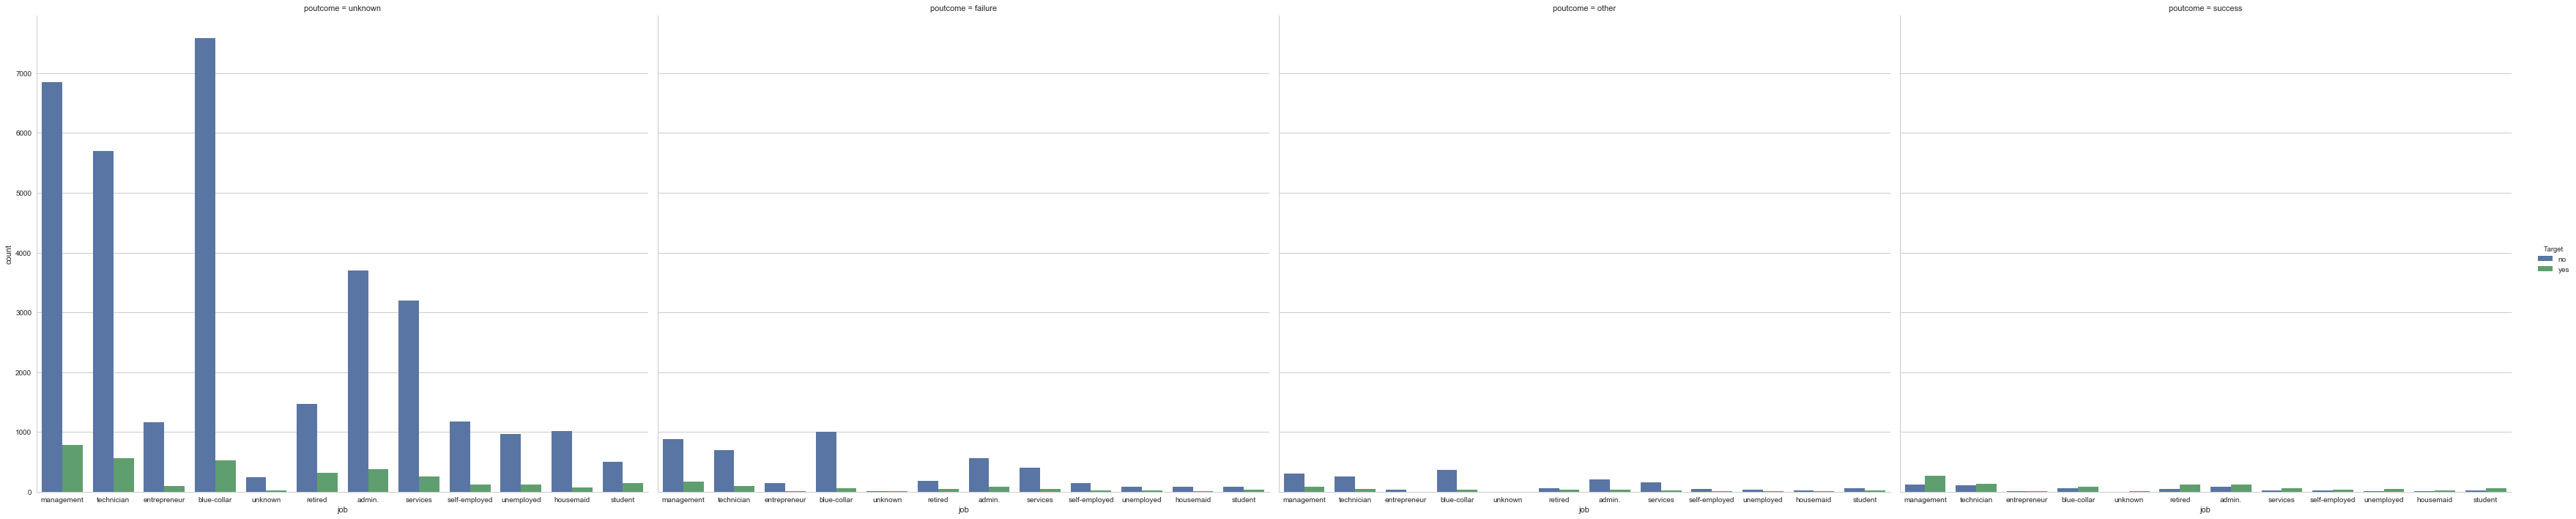

In [28]:
sns.factorplot(x="job",hue="Target",col="poutcome",data=df, legend =True,kind="count",size=10,aspect=1.2)

In [ ]:
sns.factorplot(x="job",y='age',col="Target",data=df, legend =True,kind="bar",size=10,aspect=1.2)

# balance independent variable bivariate analysis
1. We can clearly see that age and balance do not follow any clear relationship
2. Mostly Management, bluce collar and retired type job client are having good balance in theri account
3. All marital category client are having average balance
4. Teritaty and secondary educated category people are maintaining good balance

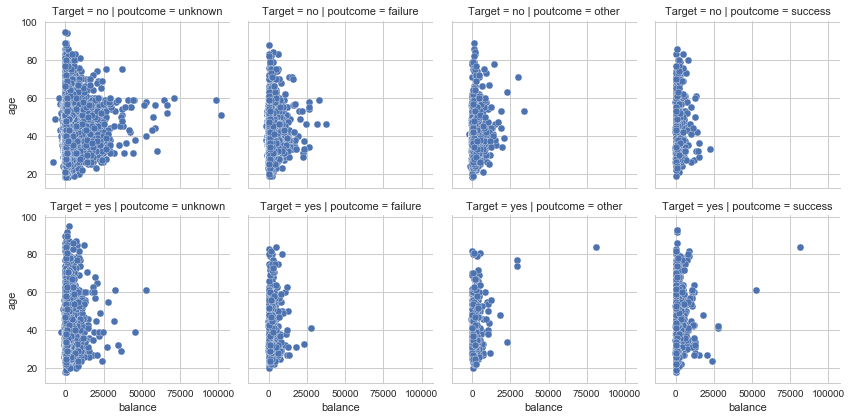

In [29]:
g = sns.FacetGrid(df, col="poutcome",row="Target")
g = g.map(plt.scatter, "balance","age",edgecolor="w")

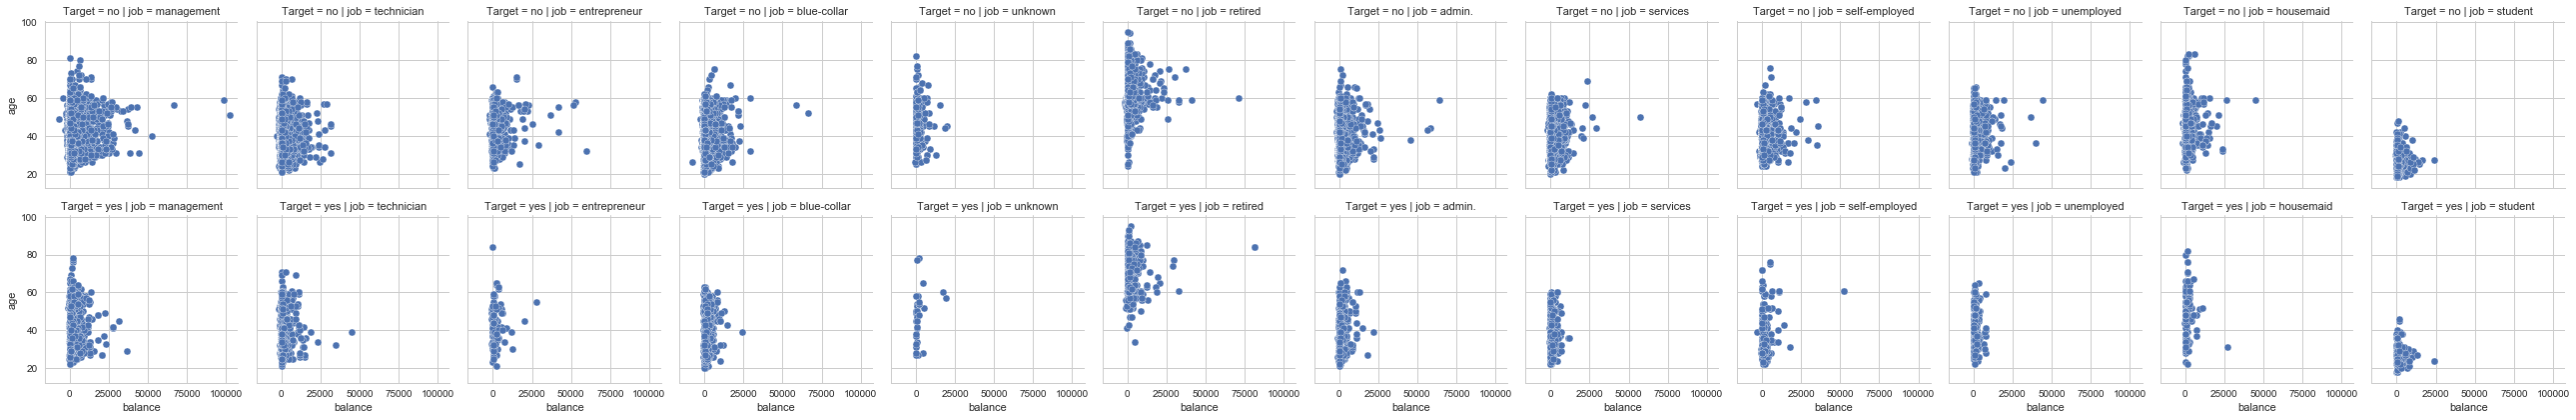

In [30]:
g = sns.FacetGrid(df, col="job",  row="Target")
g = g.map(plt.scatter, "balance", "age", edgecolor="w")

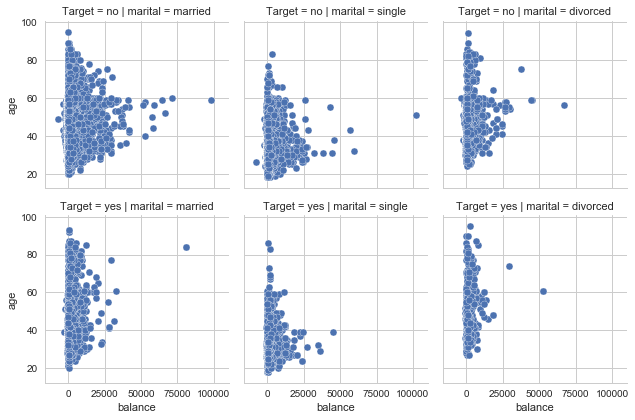

In [31]:
g = sns.FacetGrid(df, col="marital",  row="Target")
g = g.map(plt.scatter, "balance", "age", edgecolor="w")

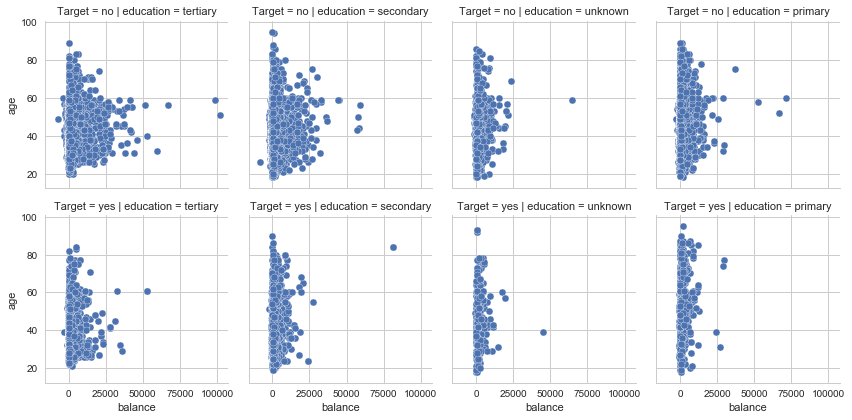

In [32]:
g = sns.FacetGrid(df, col="education",  row="Target")
g = g.map(plt.scatter, "balance", "age", edgecolor="w")

# Campaign independent variable bivariate analysis
1. Married people tends to accept term deposit on campaigning
2. Secondary and teritary educated people tends to accept term deposit on campaigning
3. Management and technician job category people tends to accept term deposit on campaigning

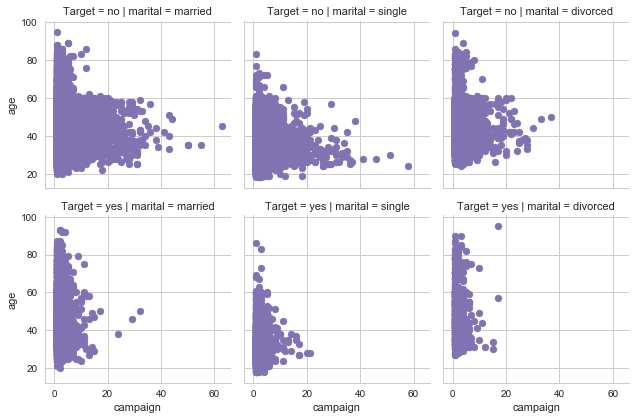

In [33]:
g = sns.FacetGrid(df, col="marital",  row="Target")
g = g.map(plt.scatter, "campaign","age",color='m')

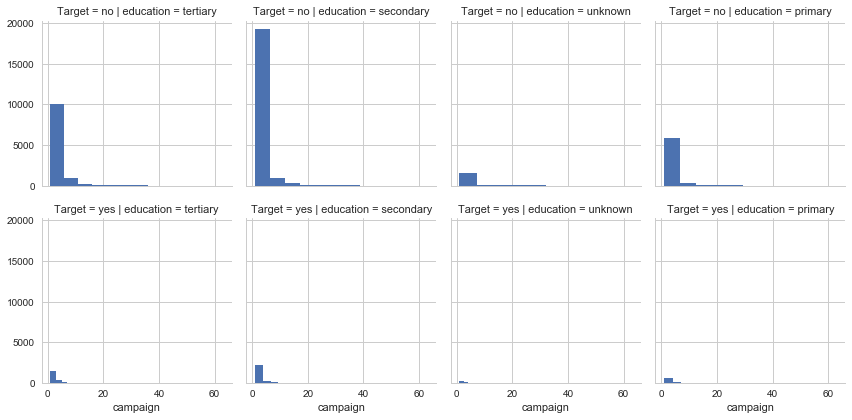

In [34]:
g = sns.FacetGrid(df, col="education",  row="Target")
g = g.map(plt.hist, "campaign",color="b")

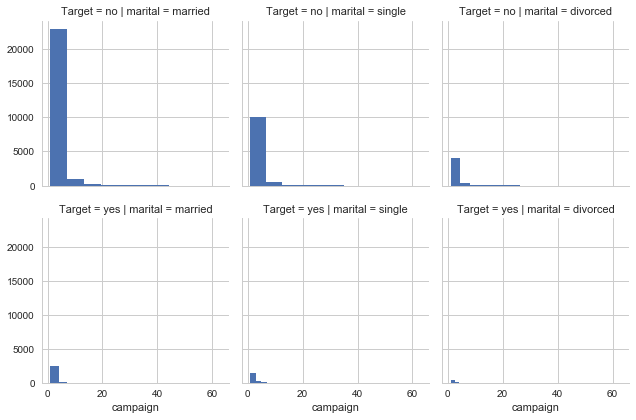

In [35]:
g = sns.FacetGrid(df, col="marital",  row="Target")
g = g.map(plt.hist, "campaign",color="b")

In [ ]:
g = sns.FacetGrid(df, col="job",  row="Target")
g = g.map(plt.hist, "campaign",color="b")

# poutcome independent variable bivariate analysis
1. Previous outcome also confirm that married people tends to accept term deposit
2. Previous outcome also confirm Secondary and teritary educated people tends to go for term deposit
3. Previous outcome also confirm Management,admin, technician and retired job category people tends to accept term deposit

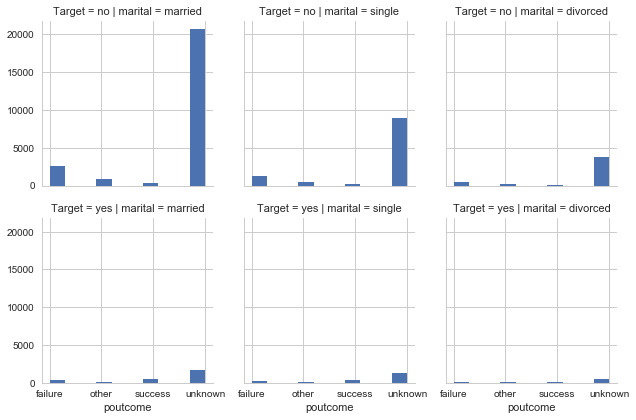

In [36]:
g = sns.FacetGrid(df, col="marital",  row="Target")
g = g.map(plt.hist, "poutcome",color="b")

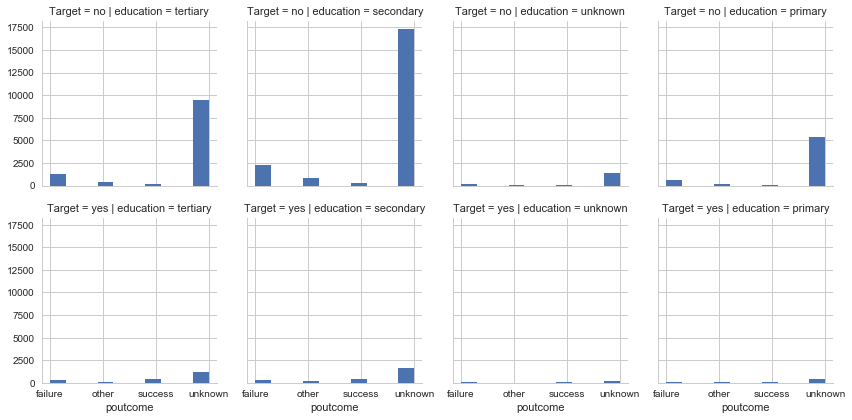

In [37]:
g = sns.FacetGrid(df, col="education",  row="Target")
g = g.map(plt.hist, "poutcome",color="b")

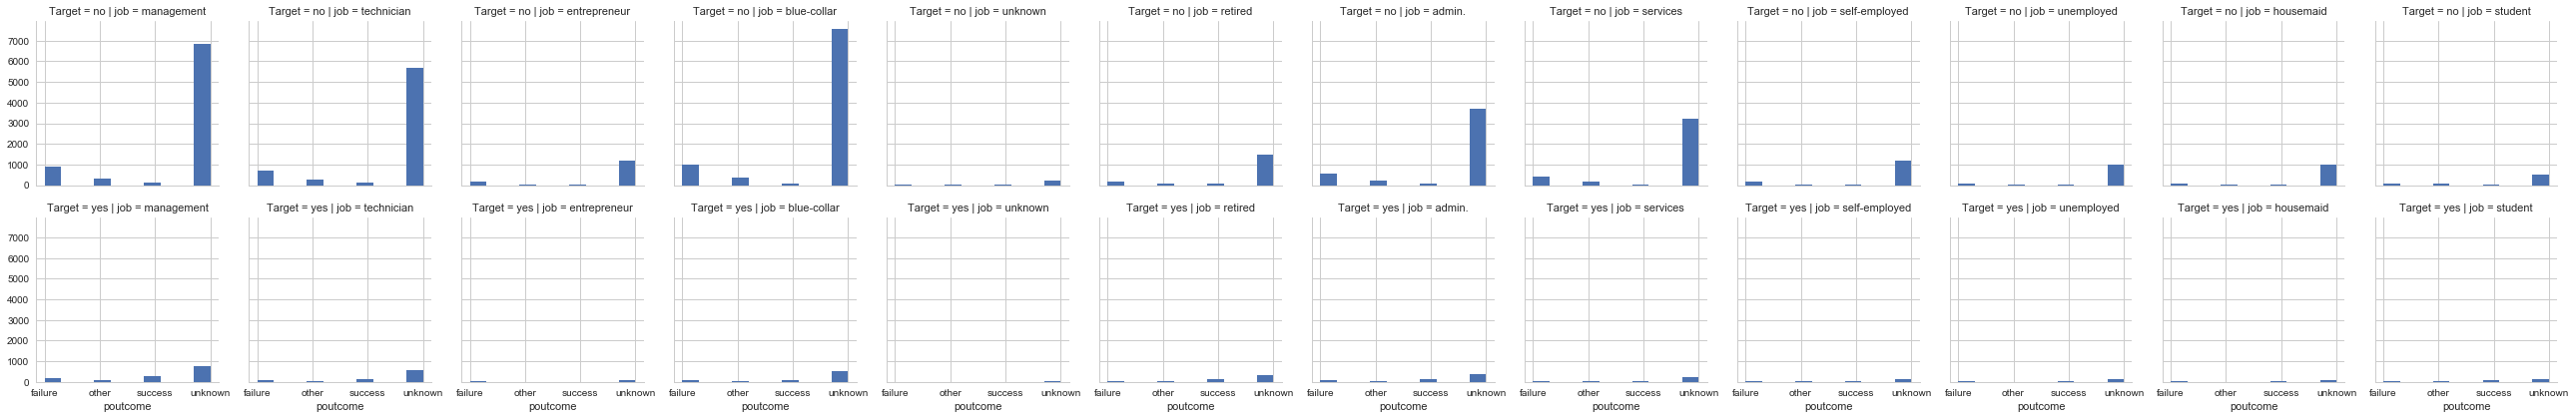

In [38]:
g = sns.FacetGrid(df, col="job",  row="Target")
g = g.map(plt.hist, "poutcome",color="b")

# Correlation analysis
It's clear from the heatmap except pdays and previous no numerical variables are highly correalted with each other

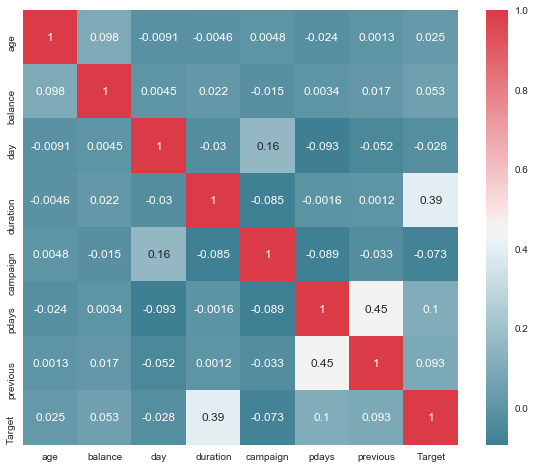

In [40]:
f,ax=plt.subplots(figsize=[10,8])
corr = df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),
           square=True,ax=ax,annot = True)

## Chi-Squared Test 
- In the case of classification problems where input variables are also categorical, we can use statistical tests to determine whether the output variable is dependent or independent of the input variables. If independent, then the input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset.
- In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:
    If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
    If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.
- After running the chi square test, all the categorical variable p- value is less than alpha so we will reject the null hypothesis and will not remove any categorical variable.


In [45]:
# Extract the ctaegory column names
catcol_names=[]
for col in df.columns:    
    if df[col].dtype == 'object' and col != 'Target':
        catcol_names.append(col)

# Chi- square test of indepdence against categorical variable
for col in catcol_names:
    print("Category column is: ",col)
    chi2, p, dof, exp=chi2_contingency(pd.crosstab(df['Target'],df[col]))
    print(p, p>0.05)

Category column is:  job
3.337121944935502e-172 False
Category column is:  marital
2.1450999986791486e-43 False
Category column is:  education
1.6266562124072994e-51 False
Category column is:  default
2.4538606753508344e-06 False
Category column is:  housing
2.918797605076633e-192 False
Category column is:  loan
1.665061163492756e-47 False
Category column is:  contact
1.251738325340495e-225 False
Category column is:  month
0.0 False
Category column is:  poutcome
0.0 False


# Multicollinearity 

- Age and day seems to be highly collinear variable
- The VIF for both variable is above 2.5 so we should normalize the variable

In [63]:
num_data = df._get_numeric_data()
pd.Series([variance_inflation_factor(num_data.values, i) 
               for i in range(num_data.shape[1])], 
              index=num_data.columns)

age         5.004058
balance     1.212908
day         3.984268
duration    1.901309
campaign    1.824694
pdays       1.454202
previous    1.341641
dtype: float64

# Prepare the data for analytics

In [126]:
df_dummy =  df.copy()

In [127]:
# Pefrom the label encoding for the binary category variables
df['Target']=LabelEncoder().fit_transform(df['Target'])
df['loan']=LabelEncoder().fit_transform(df['loan'])
df['housing']=LabelEncoder().fit_transform(df['housing'])

In [128]:
col_names = ['age','balance','campaign','pdays','previous','duration']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df[col_names] = features

C:\Users\tdhqv8\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [129]:
df_dummy = pd.get_dummies(df, columns = ["job", "education", "marital", "contact", "month",
                                     "poutcome"])

In [130]:
df_dummy.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,no,0.256419,1,0,5,0.011016,-0.569351,-0.411453,-0.25194,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,no,-0.437895,1,0,5,-0.416127,-0.569351,-0.411453,-0.25194,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,no,-0.446762,1,1,5,-0.707361,-0.569351,-0.411453,-0.25194,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,no,0.047205,1,0,5,-0.645231,-0.569351,-0.411453,-0.25194,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,no,-0.447091,0,0,5,-0.233620,-0.569351,-0.411453,-0.25194,...,0,0,1,0,0,0,0,0,0,1


In [131]:
df_dummy.shape

(45211, 49)

In [69]:
df_dummy.drop(['default'],axis=1,inplace=True)

In [70]:
df_dummy.columns

Index(['age', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'Target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [71]:
X= df_dummy.drop(["Target"],axis=1)

In [72]:
y=df_dummy.pop('Target')

In [83]:
 from sklearn.model_selection import StratifiedShuffleSplit

# StratifiedShuffleSplit
- Provides train/test indices to split data in train/test sets.
- This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.
- The datset is haveing imbabalnce condition because inappropriate proportion of target dependent variable categories.
-  So We want to make sure that our training and test set contains the same ratio of 87% "no" and 13% "yes".

In [86]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [102]:
X_train.shape, X_test.shape

((31647, 45), (13564, 45))